## Linear Regression Model<small>

The general form of a linear regression model is:

**y = α + βx + ε**

Where:
- **α (alpha)**: Intercept term (also called the constant). Represents the expected value of `y` when `x = 0`.
- **β (beta)**: Slope coefficient. Measures the sensitivity of `y` to changes in `x`.
- **ε (epsilon)**: Error term. Captures the portion of `y` not explained by the model.

---

### Financial Application Example:

**r_portfolio = α + β × r_market + ε**

- **r_portfolio**: Return of the portfolio
- **r_market**: Return of the market (e.g., S&P 500)
- **α (alpha)**: The portfolio's return independent of the market (i.e., skill-based or manager alpha)
- **β (beta)**: Measures how much the portfolio moves relative to the market (systematic risk)

---

### Interpretation:

- If **β = 1**, we expect a **1:1 relationship** between the portfolio and the market.
  For example, if the market goes up by 1%, the portfolio is expected to go up by 1% as well.

- If **α = 1**, then regardless of the market’s return, the portfolio earns **an additional 1% return** due to alpha. This is often interpreted as the manager’s skill or excess return.

---

### R² (R-squared)

- R² measures the **percentage of variation in `y` explained by the model**.
- Values range from 0 to 1:
  - **0**: The model explains none of the variation.
  - **1**: The model perfectly explains the variation.

#### Example Comparison:

- **Case 1:** β = 1, R² = 0.1
  The portfolio moves with the market, but only **10% of the portfolio’s variation** is explained by market movements.

- **Case 2:** β = 0.5, R² = 0.5
  The portfolio is **less sensitive** to the market, but the model explains **50% of its variation**, which is higher explanatory power.

---

### Key Insight:

A **large β** with a **low R²** means the variable (e.g., market) has a **strong effect directionally** but **does not explain much of the variability**.

This is common in real-world scenarios. For example:
- A student’s **final exam score** might have a high β on **study time**, meaning more hours predict higher scores.
- But if R² is low, **many other factors** (like sleep, test anxiety, or prior knowledge) are influencing the score that the model doesn’t capture.

> So: **Don’t confuse high β with high predictive power.**

In [3]:
from statistics import covariance

import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filepath = "data/multi_asset_etf_data.xlsx"

In [5]:
total_returns = pd.read_excel(filepath, sheet_name = 'total returns', index_col = 0)
portfolio_returns = pd.read_excel(filepath, sheet_name = 'portfolio returns', index_col = 0)

In [14]:
spy = total_returns['SPY']

x= spy
y = portfolio_returns

X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     575.0
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           6.19e-58
Time:                        09:32:36   Log-Likelihood:                 499.84
No. Observations:                 182   AIC:                            -995.7
Df Residuals:                     180   BIC:                            -989.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.001     -1.347      0.180      -0.004       0.001
SPY            0.6525      0.027     23.979      0.000       0.599       0.706
==============================================================================
Omnibus:                       15.927   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.143
Skew:                           0.473   Prob(JB):                     2.10e-06
Kurtosis:                       4.597   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

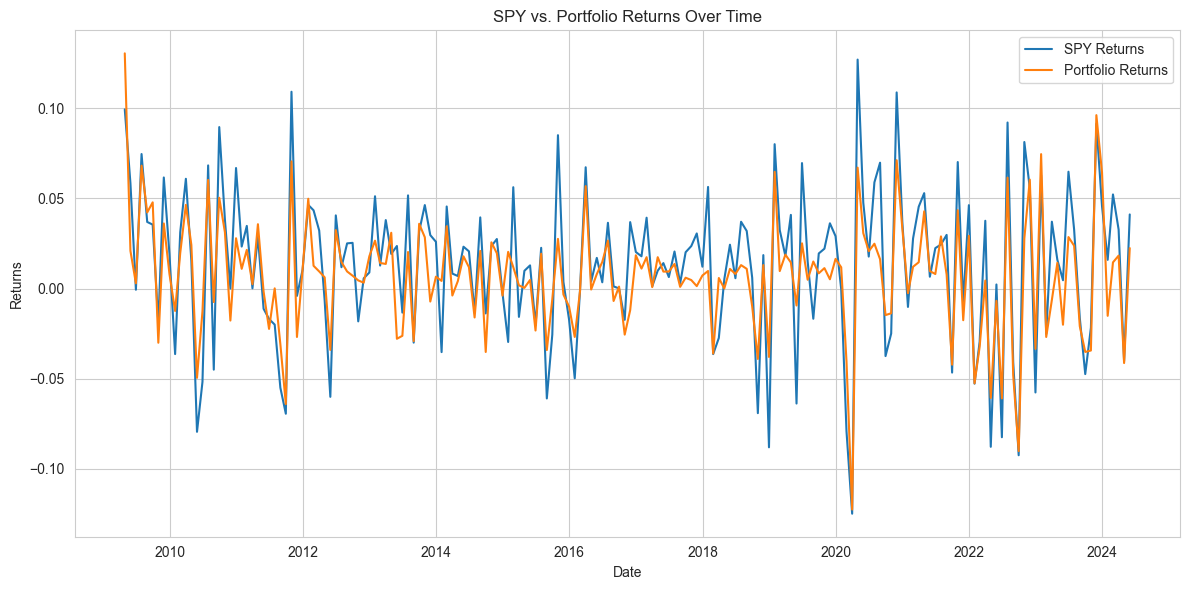

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=spy.index, y=spy, label='SPY Returns')
sns.lineplot(x=portfolio_returns.index, y=portfolio_returns.values.flatten(), label='Portfolio Returns')
plt.title("SPY vs. Portfolio Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Regression Summary (Interpretation) <small>

- **Beta (SPY coef):** 0.649 → Portfolio moves ~0.65% for every 1% move in SPY.
- **R²:** 0.770 → SPY explains 77% of the variation in portfolio returns.
- **Alpha (Intercept):** -0.0016 → Not statistically significant (check p-value).
- **Skew:** 0.485 → Slight right skew in residuals.
- **Kurtosis:** 4.719 → Heavier tails than normal; suggests more extreme residuals.
- **Condition Number:** 23.5 → No multicollinearity (values >30 indicate potential issues).

### Stat Measures:<small>

- **T-Value:**
  Calculated as `coefficient / standard error`.
  A higher t-value indicates the coefficient is **more statistically significant**.

- **P-Value:**
  Probability of observing a t-value as extreme as the one calculated, assuming the **null hypothesis** is true.
  - **Low p-value (e.g., < 0.05)** → strong evidence **against** the null; coefficient is significant.
  - **High p-value (e.g., 0.18)** → **fail to reject** the null; coefficient likely not significant.

  **Example:**
  - If `p = 0.18` → fail to reject the null → no strong evidence SPY impacts the portfolio.
  - If `p = 0.000` → reject the null → SPY **does** have a statistically significant impact.

---

### Univariate Regression<small>

- This means you have **1 independent variable** and **1 dependent variable**.
- **Beta (β):**  
  $$
  \beta = \frac{\text{Cov}(y, x)}{\text{Var}(x)}
  $$
- **R²:**  
  $$
  R^2 = \left[ \text{Corr}(y, x) \right]^2
  $$

---

### Key Formulas:

- **Covariance:**  
  $$
  \text{Cov}(y, x) = \frac{1}{n - 1} \sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x})
  $$

- **Variance:**  
  $$
  \text{Var}(x) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
  $$

- **Correlation:**  
  $$
  \text{Corr}(y, x) = \frac{\text{Cov}(y, x)}{\sigma_y \cdot \sigma_x}
  $$
  Where \( \sigma_y \) and \( \sigma_x \) are the standard deviations of \( y \) and \( x \).

---

These relationships are foundational in linear regression and directly explain how **β** and **R²** are derived from raw data.




### Variance and Sigma (Standard Deviation)<small>

- **Variance** measures the average squared deviation from the mean:
  $$
  \text{Var}(x) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
  $$

- **Sigma (σ)** is the **standard deviation**, which is simply the **square root of the variance**:
  $$
  \sigma_x = \sqrt{\text{Var}(x)}
  $$

- Variance tells you the spread of values, but in **squared units**.
- Standard deviation (σ) gives the **same spread**, but in **original units**, making it easier to interpret.

So:
$$
\sigma^2 = \text{Var}(x)
\quad \text{and} \quad
\sigma = \sqrt{\text{Var}(x)}
$$

In [22]:
#correlation (Beta)
correlation = pd.concat([spy, portfolio_returns], axis=1)
correlation.corr()


,SPY,portfolio
SPY,1.000000,0.872689
portfolio,0.872689,1.000000


Notice this 0.87 correlations is different from the beta of 0.65. This is because
- Beta answers: _“How much does `y` change when `x` changes?”_
- Correlation answers: _“How consistently do `x` and `y` move together?”_

In [31]:
var = spy.std()**2
std = spy.std()
covar = np.cov(spy, portfolio_returns.values.flatten())[1][0]
print(covar)

0.001186454908622925


Since covariance is + it means portfolio and spy move together. If cov is 0, then there is no linear relationship, if it is negative then move apart

Multivariate

### Multivariate Regression

- In multivariate regression, you include **multiple independent variables** (e.g., `r_mkt`, `r_factors`, etc.) to explain **one dependent variable** (e.g., `r_portfolio`).

- The **beta for `r_mkt` in a multivariate regression** will generally differ from the beta in a univariate regression, because:
  - In a **univariate model**, `β` captures the total effect of `r_mkt` on the portfolio.
  - In a **multivariate model**, `β` captures the **partial effect** of `r_mkt`, **holding all other variables constant**.

- This means:
  > The beta in a multivariate regression measures the **marginal contribution** of one variable **after accounting for the influence of others**.

- **Interpretation example**:
  - A beta of 0.6 on `r_mkt` means that, **controlling for all other included variables**, a 1% increase in `r_mkt` leads to an expected 0.6% increase in portfolio return.

- **Important Note on Comparing Betas**:
  - Betas are influenced by the **scale** of their variables.
  - To compare the **relative importance** of variables in a multivariate regression, you should **standardize** them:
    $$
    \text{Standardized } \beta = \beta \cdot \left( \frac{\sigma_x}{\sigma_y} \right)
    $$
    where \( \sigma_x \) and \( \sigma_y \) are the standard deviations of the predictor and response variables, respectively.

- This allows for meaningful comparison of coefficients in terms of **standard deviation impacts**.

In [32]:
hyg = total_returns['HYG']

y = portfolio_returns
x = total_returns[['SPY', 'HYG']]

X = sm.add_constant(x)

ols = sm.OLS(y, X)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     454.1
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           7.57e-71
Time:                        09:56:41   Log-Likelihood:                 533.53
No. Observations:                 182   AIC:                            -1061.
Df Residuals:                     179   BIC:                            -1051.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.001     -1.659      0.099      -0.004       0.000
SPY            0.4048      0.036     11.318      0.000       0.334       0.475
HYG            0.5370      0.060      8.956      0.000       0.419       0.655
==============================================================================
Omnibus:                        2.116   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.929
Skew:                           0.252   Prob(JB):                        0.381
Kurtosis:                       3.023   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Date', ylabel='SPY'>

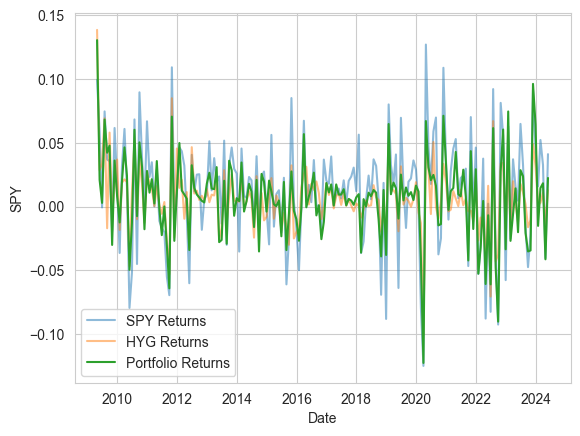

In [35]:
sns.lineplot(x=spy.index, y=spy, label='SPY Returns', alpha=.5)
sns.lineplot(x=hyg.index, y=hyg, label='HYG Returns', alpha=.5)
sns.lineplot(x = spy.index, y = portfolio_returns.values.flatten(), label='Portfolio Returns')

---

Regression w / Intercept

### Should You Include an Intercept in a Regression? <small>

- **Include an intercept** (i.e., add a constant term) if you want the model to **explain the variation in `y` around its mean**.
  - This is the default and most common approach.
  - The intercept allows the regression line to **shift vertically** to better fit the data.

- **Do NOT include an intercept** if you want the model to **force the line through the origin** — meaning you're trying to explain the **absolute level** of `y` solely through `x` (i.e., assume `y = βx` with no constant shift).
  - This is less common and usually only appropriate when you have a strong theoretical reason.

---

### Additional Notes:

- Running a regression with **only a constant** (no `x`) will simply return the **mean of `y`**.
- Regression is typically used to **explain or predict `y`**, which includes estimating both the **slope (relationship with `x`)** and the **intercept (baseline level)**.
- If your goal is to explain the **level of `y` directly from `x`** without adjusting for the average level of `y`, you might exclude the intercept — but interpret with caution.

> ✅ Rule of thumb: **Include the intercept unless you have a good reason not to.**

### Portfolio Regression Examples<small>

#### 📈 Example 1: With Intercept (Typical Case)
Model:
\[
r_{\text{portfolio}} = \alpha + \beta \cdot r_{\text{market}} + \varepsilon
\]

Interpretation:
- **Alpha (α):** Captures the portfolio’s average return **not explained by the market** (e.g., manager skill).
- **Beta (β):** Measures **sensitivity to the market**.
- Example Output:
  - α = 0.002 → 0.2% monthly alpha
  - β = 0.7 → 70% as volatile as the market
  - Interpretation: Portfolio earns 0.2% alpha monthly, and reacts to market moves but less than 1-for-1.

✅ Use this when you're evaluating **performance + market sensitivity**.

---

#### ❌ Example 2: Without Intercept (Explaining Absolute Levels)
Model:
\[
r_{\text{portfolio}} = \beta \cdot r_{\text{market}} + \varepsilon
\]

Interpretation:
- There’s **no alpha** term.
- The model assumes that **if the market has 0 return, so does the portfolio**.
- Example Output:
  - β = 0.85
  - Interpretation: The portfolio return is fully explained by 85% exposure to the market. No attempt is made to capture excess return.

⚠️ Use **only if you believe the portfolio has no standalone return** or you want to **force the regression through the origin**.

---

> 💡 Best Practice: **Always include an intercept unless you're modeling a pure replication strategy (e.g., synthetic ETFs, index portfolios)**.

Times when its not good to include an intercept is when you are trying to replicate an etf or strategy

---

R^2

- R^2 = regression (sum of square differences)/ total(sum of square)
- R^2y,x = b sum(i =1, n) (xi - xbar)**2 / sum(i =1 to n) (yi - ybar)**2

R^2 is only good with an intercept